In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [5]:
# total number of actions
df.groupby(['action']).count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


In [6]:
df['action'].count()

8188

In [7]:
# number of unique users
df['id'].nunique()

6328

In [8]:
# size of control group and experiment group
df[df['group'] == 'experiment']['id'].nunique()

2996

In [9]:
df[df['group'] == 'control']['id'].nunique()

3332

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [15]:
# duration of this experiment
pd.to_datetime(df['timestamp'].max()) - pd.to_datetime(df['timestamp'].min())

Timedelta('115 days 16:41:40.789831')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [16]:
# action types in this experiment
df.groupby(['action']).count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


### 4. Define the click through rate (CTR) for this experiment.

CRT = unique clicks / unique views

In [19]:
u_clicks = df[df['action'] == 'click']['id'].nunique()
u_clicks

1860

In [21]:
u_views = df[df['action'] == 'view']['id'].nunique()
u_views

6328

In [22]:
u_clicks/u_views

0.2939317319848293

### 5. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.


$$H_0: CTR_{old} >= CTR_{new}$$    
$$H_1: CTR_{old} < CTR_{new}$$

OR

$$H_0: (CTR_{old} - CTR_{new}) >= 0$$
$$H_1: (CTR_{old} - CTR_{new}) < 0$$

### 6. Comparing performance for the two groups

In [42]:
control_df = df[df['group'] == 'control']
exp_df = df[df['group'] == 'experiment']

In [43]:
con_cl = control_df[control_df['action'] == 'click']['id'].nunique()
con_view = control_df[control_df['action'] == 'view']['id'].nunique()
con_crt = con_cl/con_view
con_crt

0.2797118847539016

In [44]:
exp_cl = exp_df[exp_df['action'] == 'click']['id'].nunique()
exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
exp_crt = exp_cl/exp_view
exp_crt

0.3097463284379172

In [45]:
obs_diff = con_crt - exp_crt
obs_diff

-0.030034443684015644

#### Bootstrap sampling distribution

In [35]:
df.shape[0]

8188

In [37]:
diff_dist = []
for i in range(10000):
    samp = df.sample(df.shape[0], replace = True)
    control_df = samp[samp['group'] == 'control']
    exp_df = samp[samp['group'] == 'experiment']
    con_cl = control_df[control_df['action'] == 'click']['id'].nunique()
    con_view = control_df[control_df['action'] == 'view']['id'].nunique()
    con_crt = con_cl/con_view
    exp_cl = exp_df[exp_df['action'] == 'click']['id'].nunique()
    exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
    exp_crt = exp_cl/exp_view
    crt_diff = con_crt - exp_crt
    diff_dist.append(crt_diff)

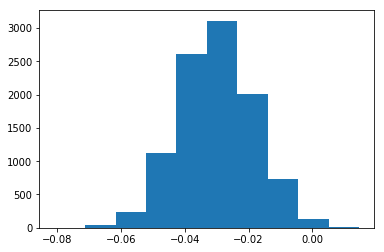

In [38]:
plt.hist(diff_dist);

#### Simulate normal distribution around null hypothesis value with standard deviation of sampling distribution

In [39]:
diff_dist = np.array(diff_dist)
null_vals = np.random.normal(0, diff_dist.std(), diff_dist.size)

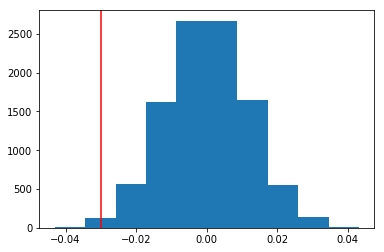

In [46]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

#### Calculate P value

In [51]:
(null_vals < obs_diff).mean()

0.0042

#### Result: Reject the null hyphotesis (as P value << 0.01) 
--> it does not look like the observed CRT difference (statistic) is from the null distribution